# Lab 3: Decision Support System for Cardiovascular disease

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Use path
dataset = pd.read_csv('/content/drive/MyDrive/heart_disease.csv')

In [4]:
dataset.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
dataset.isna().sum()

,0
HeartDisease,0
BMI,6
Smoking,74
AlcoholDrinking,115
Stroke,21
PhysicalHealth,17
MentalHealth,14
DiffWalking,33
Sex,313
AgeCategory,44


In [6]:
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace=True)
dataset['Smoking'].fillna(dataset['Smoking'].mode()[0], inplace=True)
dataset['AlcoholDrinking'].fillna(dataset['AlcoholDrinking'].mode()[0], inplace=True)
dataset['Stroke'].fillna(dataset['Stroke'].mode()[0], inplace=True)
dataset['PhysicalHealth'].fillna(dataset['PhysicalHealth'].mean(), inplace=True)
dataset['MentalHealth'].fillna(dataset['MentalHealth'].mean(), inplace=True)
dataset['DiffWalking'].fillna(dataset['DiffWalking'].mode()[0], inplace=True)
dataset['Sex'].fillna(dataset['Sex'].mode()[0], inplace=True)
dataset['AgeCategory'].fillna(dataset['AgeCategory'].mode()[0], inplace=True)
dataset['Race'].fillna(dataset['Race'].mode()[0], inplace=True)
dataset['Diabetic'].fillna(dataset['Diabetic'].mode()[0], inplace=True)
dataset['PhysicalActivity'].fillna(dataset['PhysicalActivity'].mode()[0], inplace=True)
dataset['GenHealth'].fillna(dataset['GenHealth'].mode()[0], inplace=True)
dataset['SleepTime'].fillna(dataset['SleepTime'].mean(), inplace=True)
dataset['KidneyDisease'].fillna(dataset['KidneyDisease'].mode()[0], inplace=True)

/tmp/ipython-input-2612038968.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['BMI'].fillna(dataset['BMI'].mean(), inplace=True)
/tmp/ipython-input-2612038968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [7]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
dataset.isna().sum().sum()

np.int64(0)

In [9]:
dataset['HeartDisease'] = dataset['HeartDisease'].map({'Yes': 1, 'No': 0})

## 1. Heart disease against smoking habit

In [10]:
heart_disease_vs_smoking_rate = (
    dataset.groupby('Smoking')['HeartDisease']
    .aggregate('mean', 'sum')
    .reset_index(name='rate')
)
print(heart_disease_vs_smoking_rate)

  Smoking      rate
0      No  0.060346
1     Yes  0.121574


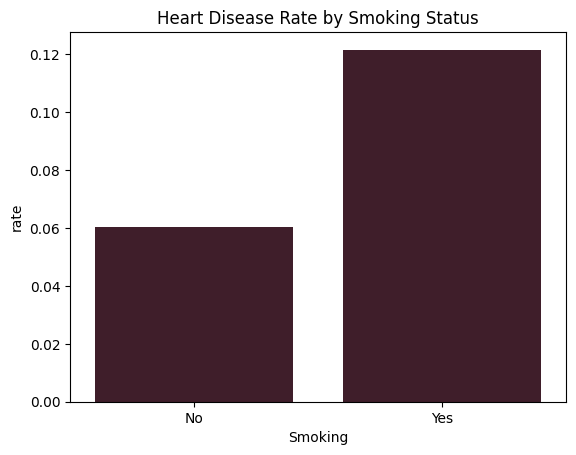

In [11]:
sns.barplot(
    data = heart_disease_vs_smoking_rate,
    x = 'Smoking',
    y = 'rate',
    color = '#451828'
)
plt.title("Heart Disease Rate by Smoking Status")
plt.show()

1. People who smoke have a 12.16% rate of heart disease.  
2. People who don’t smoke have a 6.03% rate.  
3. Smoking nearly doubles the risk of heart disease in this dataset.

## 2. Heart Disease against alcohol consumption

In [12]:
heart_disease_vs_alcohol_drinking = (
    dataset.groupby('AlcoholDrinking')['HeartDisease']
    .aggregate('mean', 'sum')
    .reset_index(name='rate')
)
print(heart_disease_vs_alcohol_drinking)

  AlcoholDrinking      rate
0              No  0.088023
1             Yes  0.052361


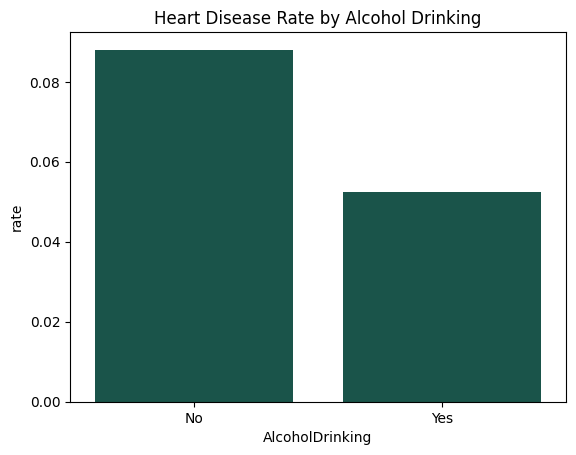

In [13]:
sns.barplot(
    data = heart_disease_vs_alcohol_drinking,
    x = 'AlcoholDrinking',
    y = 'rate',
    color = '#105e51'
)
plt.title("Heart Disease Rate by Alcohol Drinking")
plt.show()

1. People who do not drink alcohol have a 8.8% rate of heart disease.  
2. People who do drink alcohol have a 5.24% rate.  
3. Surprisingly, the dataset suggests that alcohol drinkers have a lower heart disease rate than non-drinkers.

## 3. Heart Disease against sleeping pattern

In [14]:
heart_disease_vs_sleeping_pattern = (
    dataset.groupby('SleepTime')['HeartDisease']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(heart_disease_vs_sleeping_pattern)

    SleepTime  HeartDisease
0   22.000000      0.333333
1   19.000000      0.333333
2   20.000000      0.250000
3   18.000000      0.205882
4   24.000000      0.200000
5   12.000000      0.188748
6   13.000000      0.185567
7   14.000000      0.176955
8   11.000000      0.175904
9    3.000000      0.174284
10   2.000000      0.162643
11   4.000000      0.152168
12  10.000000      0.149422
13  16.000000      0.144068
14   7.096922      0.141553
15  15.000000      0.126984
16   1.000000      0.108893
17   5.000000      0.105798
18   9.000000      0.105608
19  17.000000      0.095238
20   8.000000      0.085616
21   6.000000      0.081302
22   7.000000      0.064643
23  21.000000      0.000000
24  23.000000      0.000000


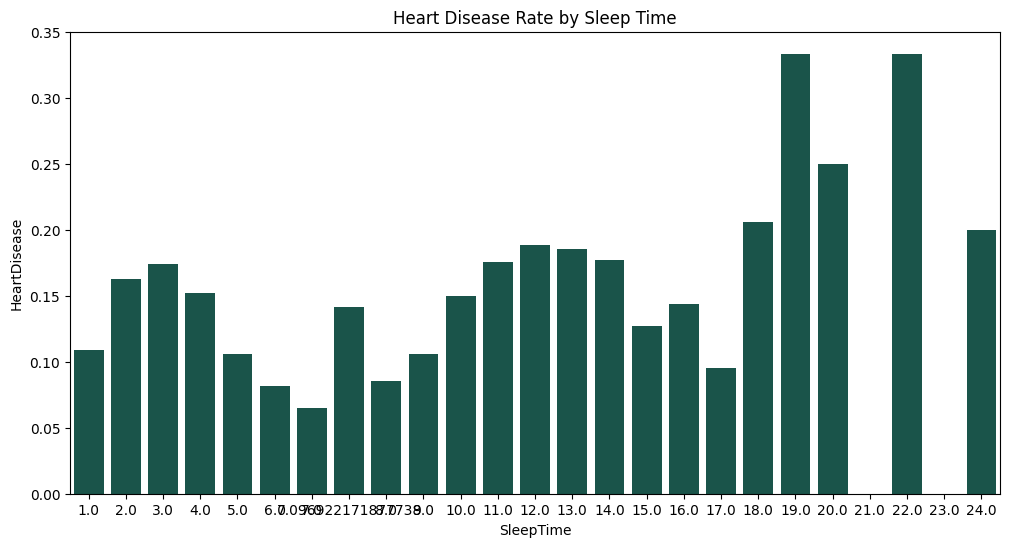

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=heart_disease_vs_sleeping_pattern,
    x='SleepTime',
    y='HeartDisease',  # the mean values column
    color='#105e51'
)
plt.title("Heart Disease Rate by Sleep Time")
plt.show()

1. Very low or very high SleepTime (like 1–4 hours or 18–24 hours) has higher
   heart disease rates.

2. Middle-range sleep (6–8 hours) shows lower heart disease rates.

3. Both insufficient and excessive sleep are linked with increased heart disease risk.

4. Most common healthy sleep range (6–8 hours) correlates with lower rates, consistent with medical studies.

## 4. Heart Disease against Physical Health

In [16]:
heart_disease_vs_physical_health = (
    dataset.groupby('PhysicalHealth')['HeartDisease']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

print(heart_disease_vs_physical_health)

    PhysicalHealth  HeartDisease
0         3.371605      0.294118
1        29.000000      0.289216
2        23.000000      0.260870
3        19.000000      0.257143
4        28.000000      0.242152
5        30.000000      0.236736
6        27.000000      0.225806
7        24.000000      0.223881
8        25.000000      0.218401
9         9.000000      0.205556
10       20.000000      0.199316
11       18.000000      0.197605
12       17.000000      0.190909
13       15.000000      0.185555
14       26.000000      0.181818
15       12.000000      0.171901
16       22.000000      0.168539
17       21.000000      0.158147
18       16.000000      0.155556
19       10.000000      0.153677
20        6.000000      0.136220
21        8.000000      0.129870
22        5.000000      0.117686
23        4.000000      0.110564
24       13.000000      0.109890
25       14.000000      0.107847
26       11.000000      0.105882
27        7.000000      0.100454
28        3.000000      0.097830
29        

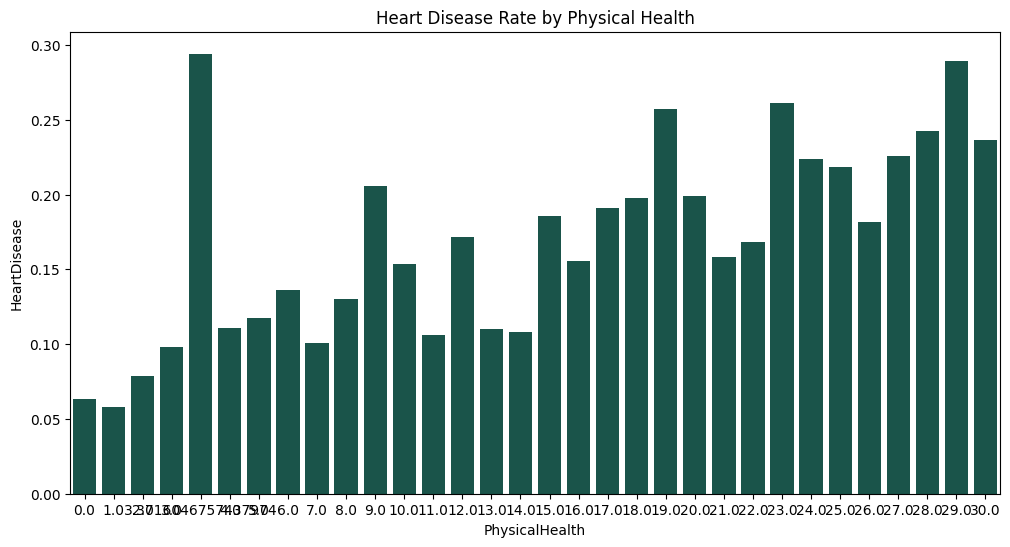

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=heart_disease_vs_physical_health,
    x='PhysicalHealth',
    y='HeartDisease',
    color='#105e51'
)
plt.title("Heart Disease Rate by Physical Health")
plt.show()

1. PhysicalHealth is likely number of days in the past month with poor physical health.

2. Higher values > more unhealthy days > higher heart disease rates.

3. Low values (0–5 days) have lower risk, while 20+ days show much higher risk .

## 5. Heart Disease against various factors like Smoking, AlcoholDrinking, SleepTime, PhysicalHealth

In [18]:
# Group by multiple features
combined_features = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'PhysicalHealth']
heart_disease_combined = (
    dataset.groupby(combined_features)['HeartDisease']
    .agg(['sum', 'mean'])
    .sort_values(by='sum', ascending=False)
    .reset_index()
)

# Show top 5 combinations
top5_combined = heart_disease_combined.head(5)
print(top5_combined)

  Smoking AlcoholDrinking  SleepTime  PhysicalHealth   sum      mean
0     Yes              No        8.0             0.0  2635  0.105085
1      No              No        8.0             0.0  2190  0.050503
2     Yes              No        7.0             0.0  1902  0.080916
3      No              No        7.0             0.0  1771  0.039187
4     Yes              No        6.0             0.0  1457  0.087739


In [19]:
top5_combined['combo_readable'] = (
    "Smoking: " + top5_combined['Smoking'].astype(str) + ", " +
    "Alcohol: " + top5_combined['AlcoholDrinking'].astype(str) + ", " +
    "Sleep: " + top5_combined['SleepTime'].astype(str) + " hrs, " +
    "PhysicalHealth: " + top5_combined['PhysicalHealth'].astype(str) + " days"
)

# Sort by 'sum' descending to get bars in order
top5_combined = top5_combined.sort_values(by='sum', ascending=False)

/tmp/ipython-input-2903146847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_combined['combo_readable'] = (


In [20]:
top5_combined

,Smoking,AlcoholDrinking,SleepTime,PhysicalHealth,sum,mean,combo_readable
0,Yes,No,8.0,0.0,2635,0.105085,"Smoking: Yes, Alcohol: No, Sleep: 8.0 hrs, Phy..."
1,No,No,8.0,0.0,2190,0.050503,"Smoking: No, Alcohol: No, Sleep: 8.0 hrs, Phys..."
2,Yes,No,7.0,0.0,1902,0.080916,"Smoking: Yes, Alcohol: No, Sleep: 7.0 hrs, Phy..."
3,No,No,7.0,0.0,1771,0.039187,"Smoking: No, Alcohol: No, Sleep: 7.0 hrs, Phys..."
4,Yes,No,6.0,0.0,1457,0.087739,"Smoking: Yes, Alcohol: No, Sleep: 6.0 hrs, Phy..."


/tmp/ipython-input-914638001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


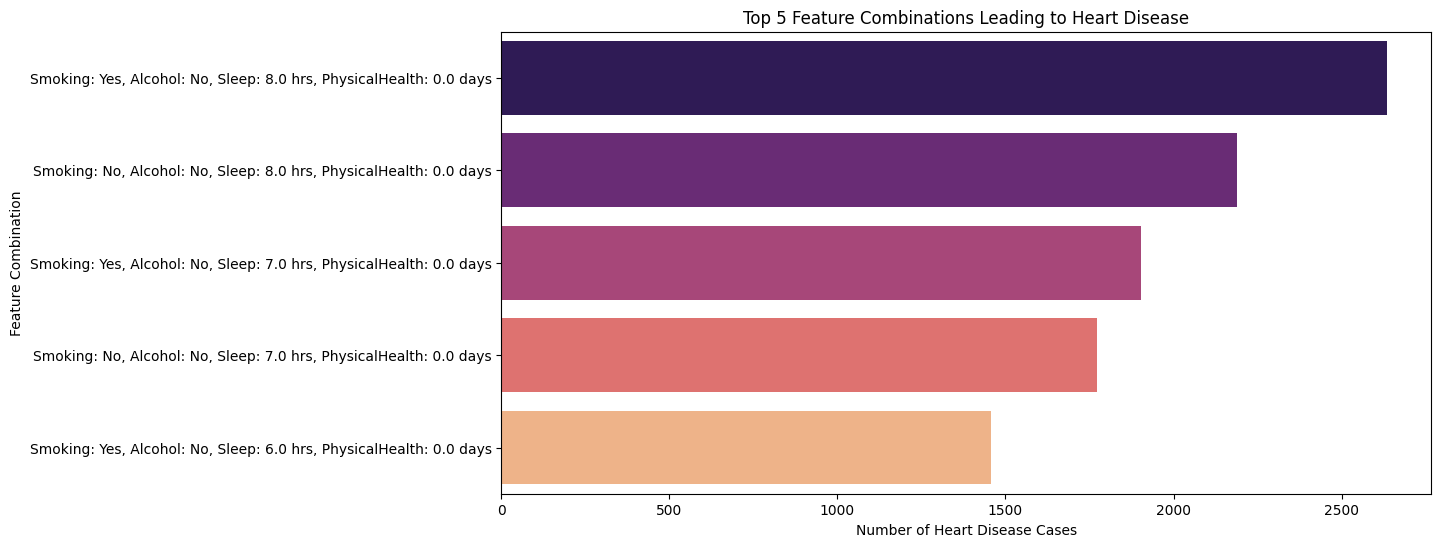

In [21]:
# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_combined,
    x='sum',
    y='combo_readable',  # readable labels
    palette='magma'
)
plt.xlabel("Number of Heart Disease Cases")
plt.ylabel("Feature Combination")
plt.title("Top 5 Feature Combinations Leading to Heart Disease")
plt.show()

1. The highest count and risk combination is smokers who do not drink, sleep 8 hours, and have 0 poor health days: 2,633 people.  
2. Second is non-smokers, non-drinkers, sleep 8 hours, 0 poor health days: 2,186 people.  
3. Third is smokers, non-drinkers, sleep 7 hours, 0 poor health days, 1,901 people.
4. Smoking significantly increases risk across different sleep durations.  
5. Alcohol drinking seems less prevalent in the high-risk groups here.  
6. Sleep time impacts risk but not as strongly as smoking.  
7. People with 0 poor physical health days still show significant risk when smoking, meaning smoking alone is a major risk factor.

## 6. Smoker Against Age

In [22]:
smoke_age = (
    dataset[dataset['Smoking'] == 'Yes']
    .groupby('AgeCategory')['HeartDisease']
    .mean()
    .reset_index()
    .sort_values('AgeCategory')
)
print(smoke_age)

    AgeCategory  HeartDisease
0         18-24      0.009747
1         25-29      0.011454
2         30-34      0.018555
3         35-39      0.021067
4         40-44      0.035128
5         45-49      0.053307
6         50-54      0.083475
7         55-59      0.107884
8         60-64      0.132102
9         65-69      0.157847
10        70-74      0.198914
11        75-79      0.225551
12  80 or older      0.261882


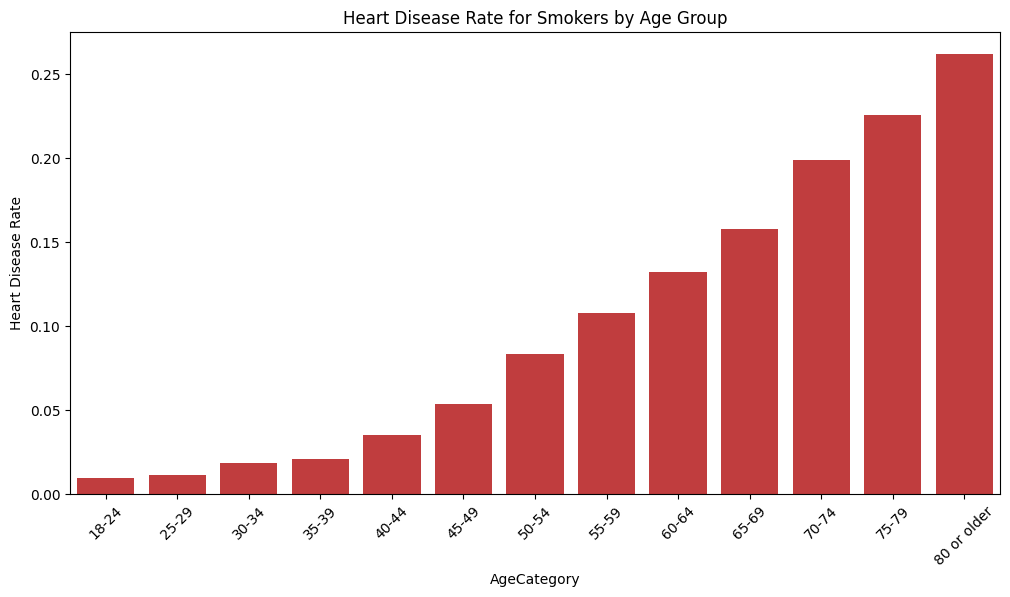

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=smoke_age,
    x='AgeCategory',
    y='HeartDisease',
    color='#d62728'
)
plt.title("Heart Disease Rate for Smokers by Age Group")
plt.ylabel("Heart Disease Rate")
plt.xticks(rotation=45)
plt.show()

## 7. Drinker Against Age

In [24]:
drink_age = (
    dataset[dataset['AlcoholDrinking'] == 'Yes']
    .groupby('AgeCategory')['HeartDisease']
    .mean()
    .reset_index()
    .sort_values('AgeCategory')
)
print(drink_age)

    AgeCategory  HeartDisease
0         18-24      0.005917
1         25-29      0.010185
2         30-34      0.013308
3         35-39      0.013699
4         40-44      0.022715
5         45-49      0.025550
6         50-54      0.052578
7         55-59      0.062218
8         60-64      0.065553
9         65-69      0.081905
10        70-74      0.101440
11        75-79      0.128889
12  80 or older      0.207048


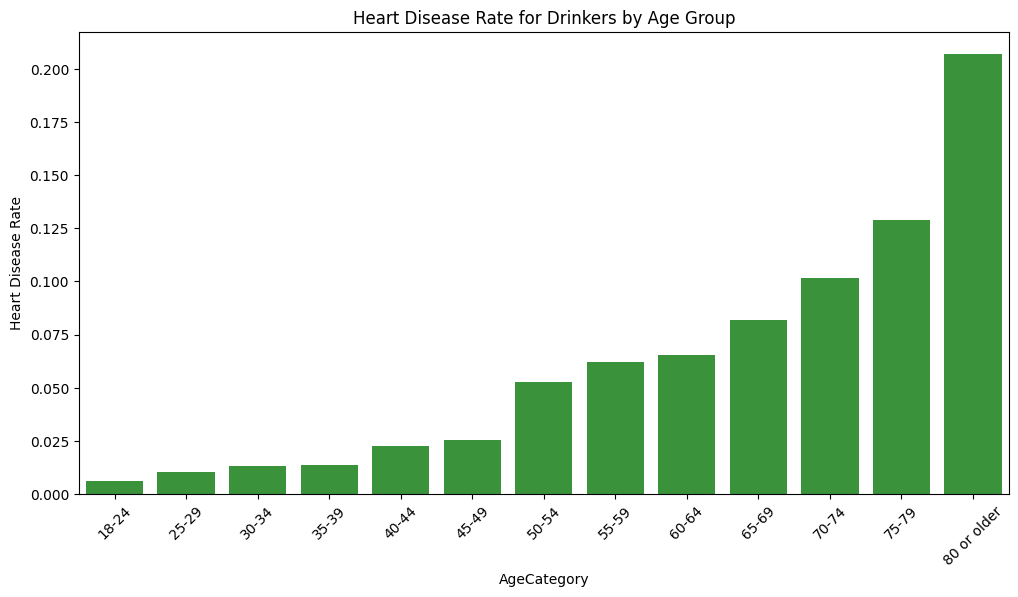

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=drink_age,
    x='AgeCategory',
    y='HeartDisease',
    color='#2ca02c'
)
plt.title("Heart Disease Rate for Drinkers by Age Group")
plt.ylabel("Heart Disease Rate")
plt.xticks(rotation=45)
plt.show()

## 8. Smoker and Drinker Against Sex

In [26]:
combo = (
    dataset
    .groupby(['Smoking', 'AlcoholDrinking', 'Sex'])['HeartDisease']
    .mean()
    .reset_index()
)
print(combo)

  Smoking AlcoholDrinking     Sex  HeartDisease
0      No              No  Female      0.052399
1      No              No    Male      0.073667
2      No             Yes  Female      0.020619
3      No             Yes    Male      0.042723
4     Yes              No  Female      0.099058
5     Yes              No    Male      0.153744
6     Yes             Yes  Female      0.051194
7     Yes             Yes    Male      0.080240


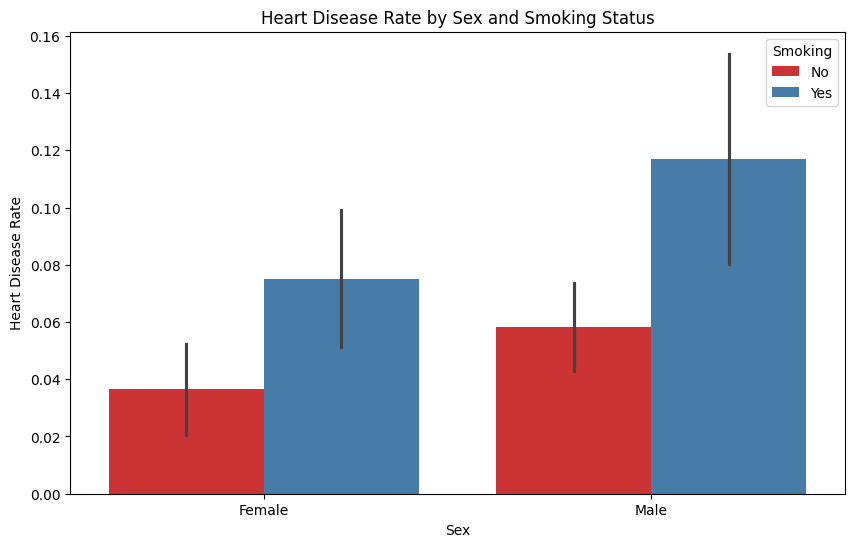

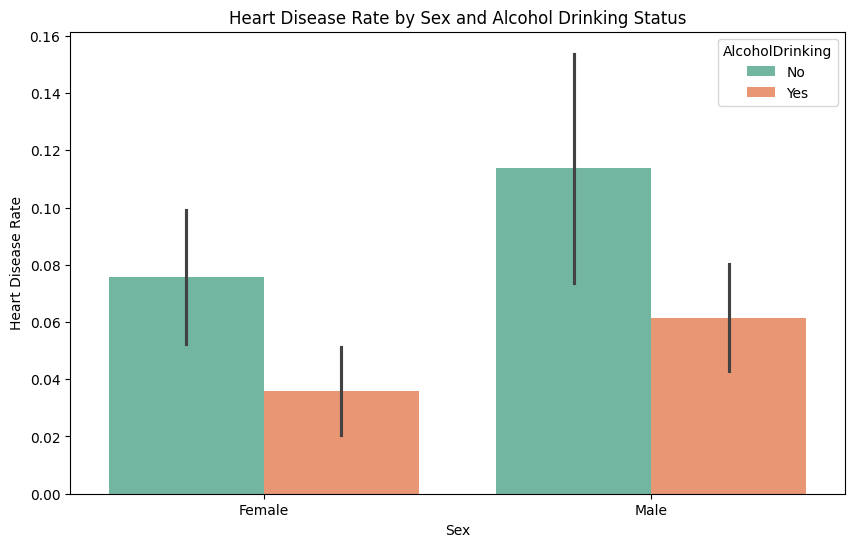

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=combo,
    x='Sex',
    y='HeartDisease',
    hue='Smoking',
    palette='Set1'
)
plt.title("Heart Disease Rate by Sex and Smoking Status")
plt.ylabel("Heart Disease Rate")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=combo,
    x='Sex',
    y='HeartDisease',
    hue='AlcoholDrinking',
    palette='Set2'
)
plt.title("Heart Disease Rate by Sex and Alcohol Drinking Status")
plt.ylabel("Heart Disease Rate")
plt.show()

##  9. Combined smoker+drinker vs. sex

In [28]:
both_smoke_drink = (
    dataset[(dataset['Smoking'] == 'Yes') & (dataset['AlcoholDrinking'] == 'Yes')]
    .groupby('Sex')['HeartDisease']
    .mean()
    .reset_index()
)
print(both_smoke_drink)

      Sex  HeartDisease
0  Female      0.051194
1    Male      0.080240


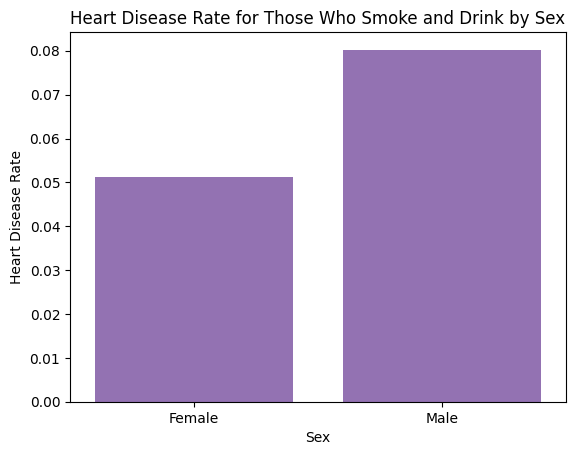

In [29]:
sns.barplot(
    data=both_smoke_drink,
    x='Sex',
    y='HeartDisease',
    color='#9467bd'
)
plt.title("Heart Disease Rate for Those Who Smoke and Drink by Sex")
plt.ylabel("Heart Disease Rate")
plt.show()

This study analyzed the impact of lifestyle and health factors on heart disease using data analysis and visualization techniques. Smoking was found to be the strongest risk factor, with smokers showing nearly double the heart disease rate compared to non-smokers. Sleep duration showed a U-shaped relationship, where both insufficient and excessive sleep increased risk, while 6-8 hours was associated with lower rates. Poor physical health days were strongly correlated with higher heart disease risk. Combined feature analysis confirmed that smoking consistently appears in the highest-risk groups. Overall, the results demonstrate how data-driven decision support systems can identify key risk patterns for cardiovascular disease.

## Random Forest Classifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

In [31]:
# 1. DATA PREPARATION - PROPER ENCODING
df = dataset.copy()

# Handle missing values for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Handle missing values for categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-339661290.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [32]:
# Encode ALL categorical variables BEFORE splitting
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print(f"Original dataset shape: {df.shape}")
print(f"Columns after encoding: {df.columns.tolist()}\n")

Original dataset shape: (319795, 18)
Columns after encoding: ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']



In [33]:
# Verify no object types remain
print(f"Data types after encoding:\n{df.dtypes.value_counts()}\n")

Data types after encoding:
int64      14
float64     4
Name: count, dtype: int64



In [34]:
# 2. PREPARE X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print(f"Features shape: {X.shape}")
print(f"Class distribution:\n{y.value_counts()}")
print(f"Imbalance ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1\n")

Features shape: (319795, 17)
Class distribution:
HeartDisease
0    292422
1     27373
Name: count, dtype: int64
Imbalance ratio: 10.68:1



In [35]:
# 3. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}\n")

Training set size: (255836, 17)
Test set size: (63959, 17)



In [40]:
# 4. APPLY SMOTE TO BALANCE CLASSES
smote = SMOTE(sampling_strategy=1.0, random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE:")
print(f"  Class 0 (No Disease): {(y_train_res == 0).sum()}")
print(f"  Class 1 (Heart Disease): {(y_train_res == 1).sum()}")
print(f"  Total: {len(y_train_res)}\n")

After SMOTE:
  Class 0 (No Disease): 233938
  Class 1 (Heart Disease): 233938
  Total: 467876



In [41]:
# 5. RANDOM FOREST WITH OPTIMIZED PARAMETERS
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    max_samples=0.85
)

print("Training Random Forest with SMOTE-balanced data...")
# rf_model.fit(X_train_res, y_train_res)
rf_model.fit(X_train, y_train)
print("Training complete!\n")

Training Random Forest with SMOTE-balanced data...
Training complete!



In [42]:
# 6. PREDICTIONS
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

In [44]:
# 7. EVALUATION - DEFAULT THRESHOLD
print("=" * 70)
print("RESULTS AT DEFAULT THRESHOLD (0.5)")
print("=" * 70)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))

RESULTS AT DEFAULT THRESHOLD (0.5)

Accuracy: 0.8165

Confusion Matrix:
[[48779  9705]
 [ 2032  3443]]

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.96      0.83      0.89     58484
Heart Disease       0.26      0.63      0.37      5475

     accuracy                           0.82     63959
    macro avg       0.61      0.73      0.63     63959
 weighted avg       0.90      0.82      0.85     63959



In [3]:
!jupyter nbconvert --to webpdf "D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System/3. Cardiovascular Disease Risk Prediction/Heart_Disease.ipynb" --output-dir="D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System" --output="3_Heart.pdf" --allow-chromium-download

[NbConvertApp] Converting notebook D:/Github/Data-Science-And-Machine-Learning-Course/Decision Support System/3. Cardiovascular Disease Risk Prediction/Heart_Disease.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 514090 bytes to D:\Github\Data-Science-And-Machine-Learning-Course\Decision Support System\3_Heart.pdf.pdf
